In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
path = '../img/test1.jpg'
img = cv2.imread(path)
img = cv2.GaussianBlur(img, (5,5),0)

In [2]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

In [3]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros(img.shape[:-1], np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

In [4]:
dst = cv2.bitwise_and(img, img, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

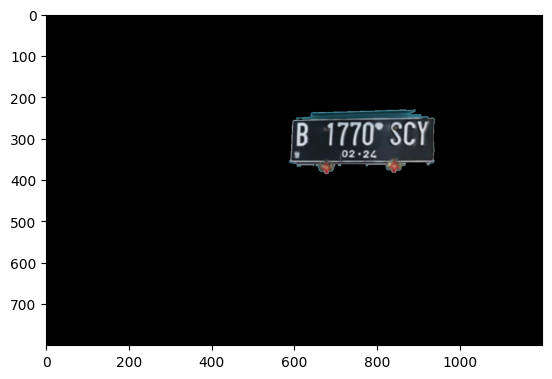

In [5]:
plt.imshow(segmented)

In [6]:
plt.imsave('after.png', segmented, format='png')